# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
#Supress Warnings
#import warnings
#warnings.filterwarnings('ignore')

#Import Libraries
import numpy as np
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

#Import libraries to perform linear regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


#Import CSV file and create dataframe
df_project= pd.read_csv("C:\\Users\\launchcode\\Desktop\\CoderGirl\\clean_data_project3.csv")
df_project.describe()

,Unnamed: 0,Rating,min_salary,max_salary,average_salary,Python,R,Spark,AWS,Excel,...,Scikit,SQL,Pytorch,BI,Tensor,Flink,Mongo,Google_an,Tableau,Hadoop
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000
mean,469.129380,3.618868,71.588949,126.216981,98.902965,0.528302,0.002695,0.225067,0.237197,0.522911,...,0.072776,0.512129,0.052561,0.978437,0.097035,0.013477,0.049865,0.0,0.199461,0.167116
std,279.793117,0.801210,32.425720,49.144202,39.474347,0.499535,0.051882,0.417908,0.425651,0.499812,...,0.259944,0.500190,0.223305,0.145351,0.296205,0.115384,0.217813,0.0,0.399865,0.373331
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,221.500000,3.300000,50.000000,96.000000,72.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,472.500000,3.700000,68.000000,124.000000,96.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,707.750000,4.000000,89.750000,155.000000,121.875000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,955.000000,5.000000,202.000000,306.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

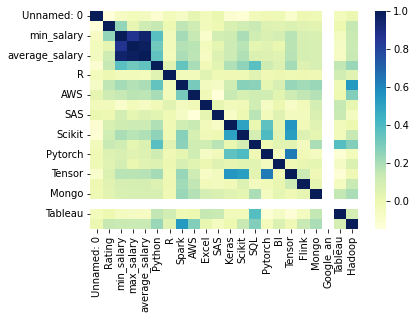

None


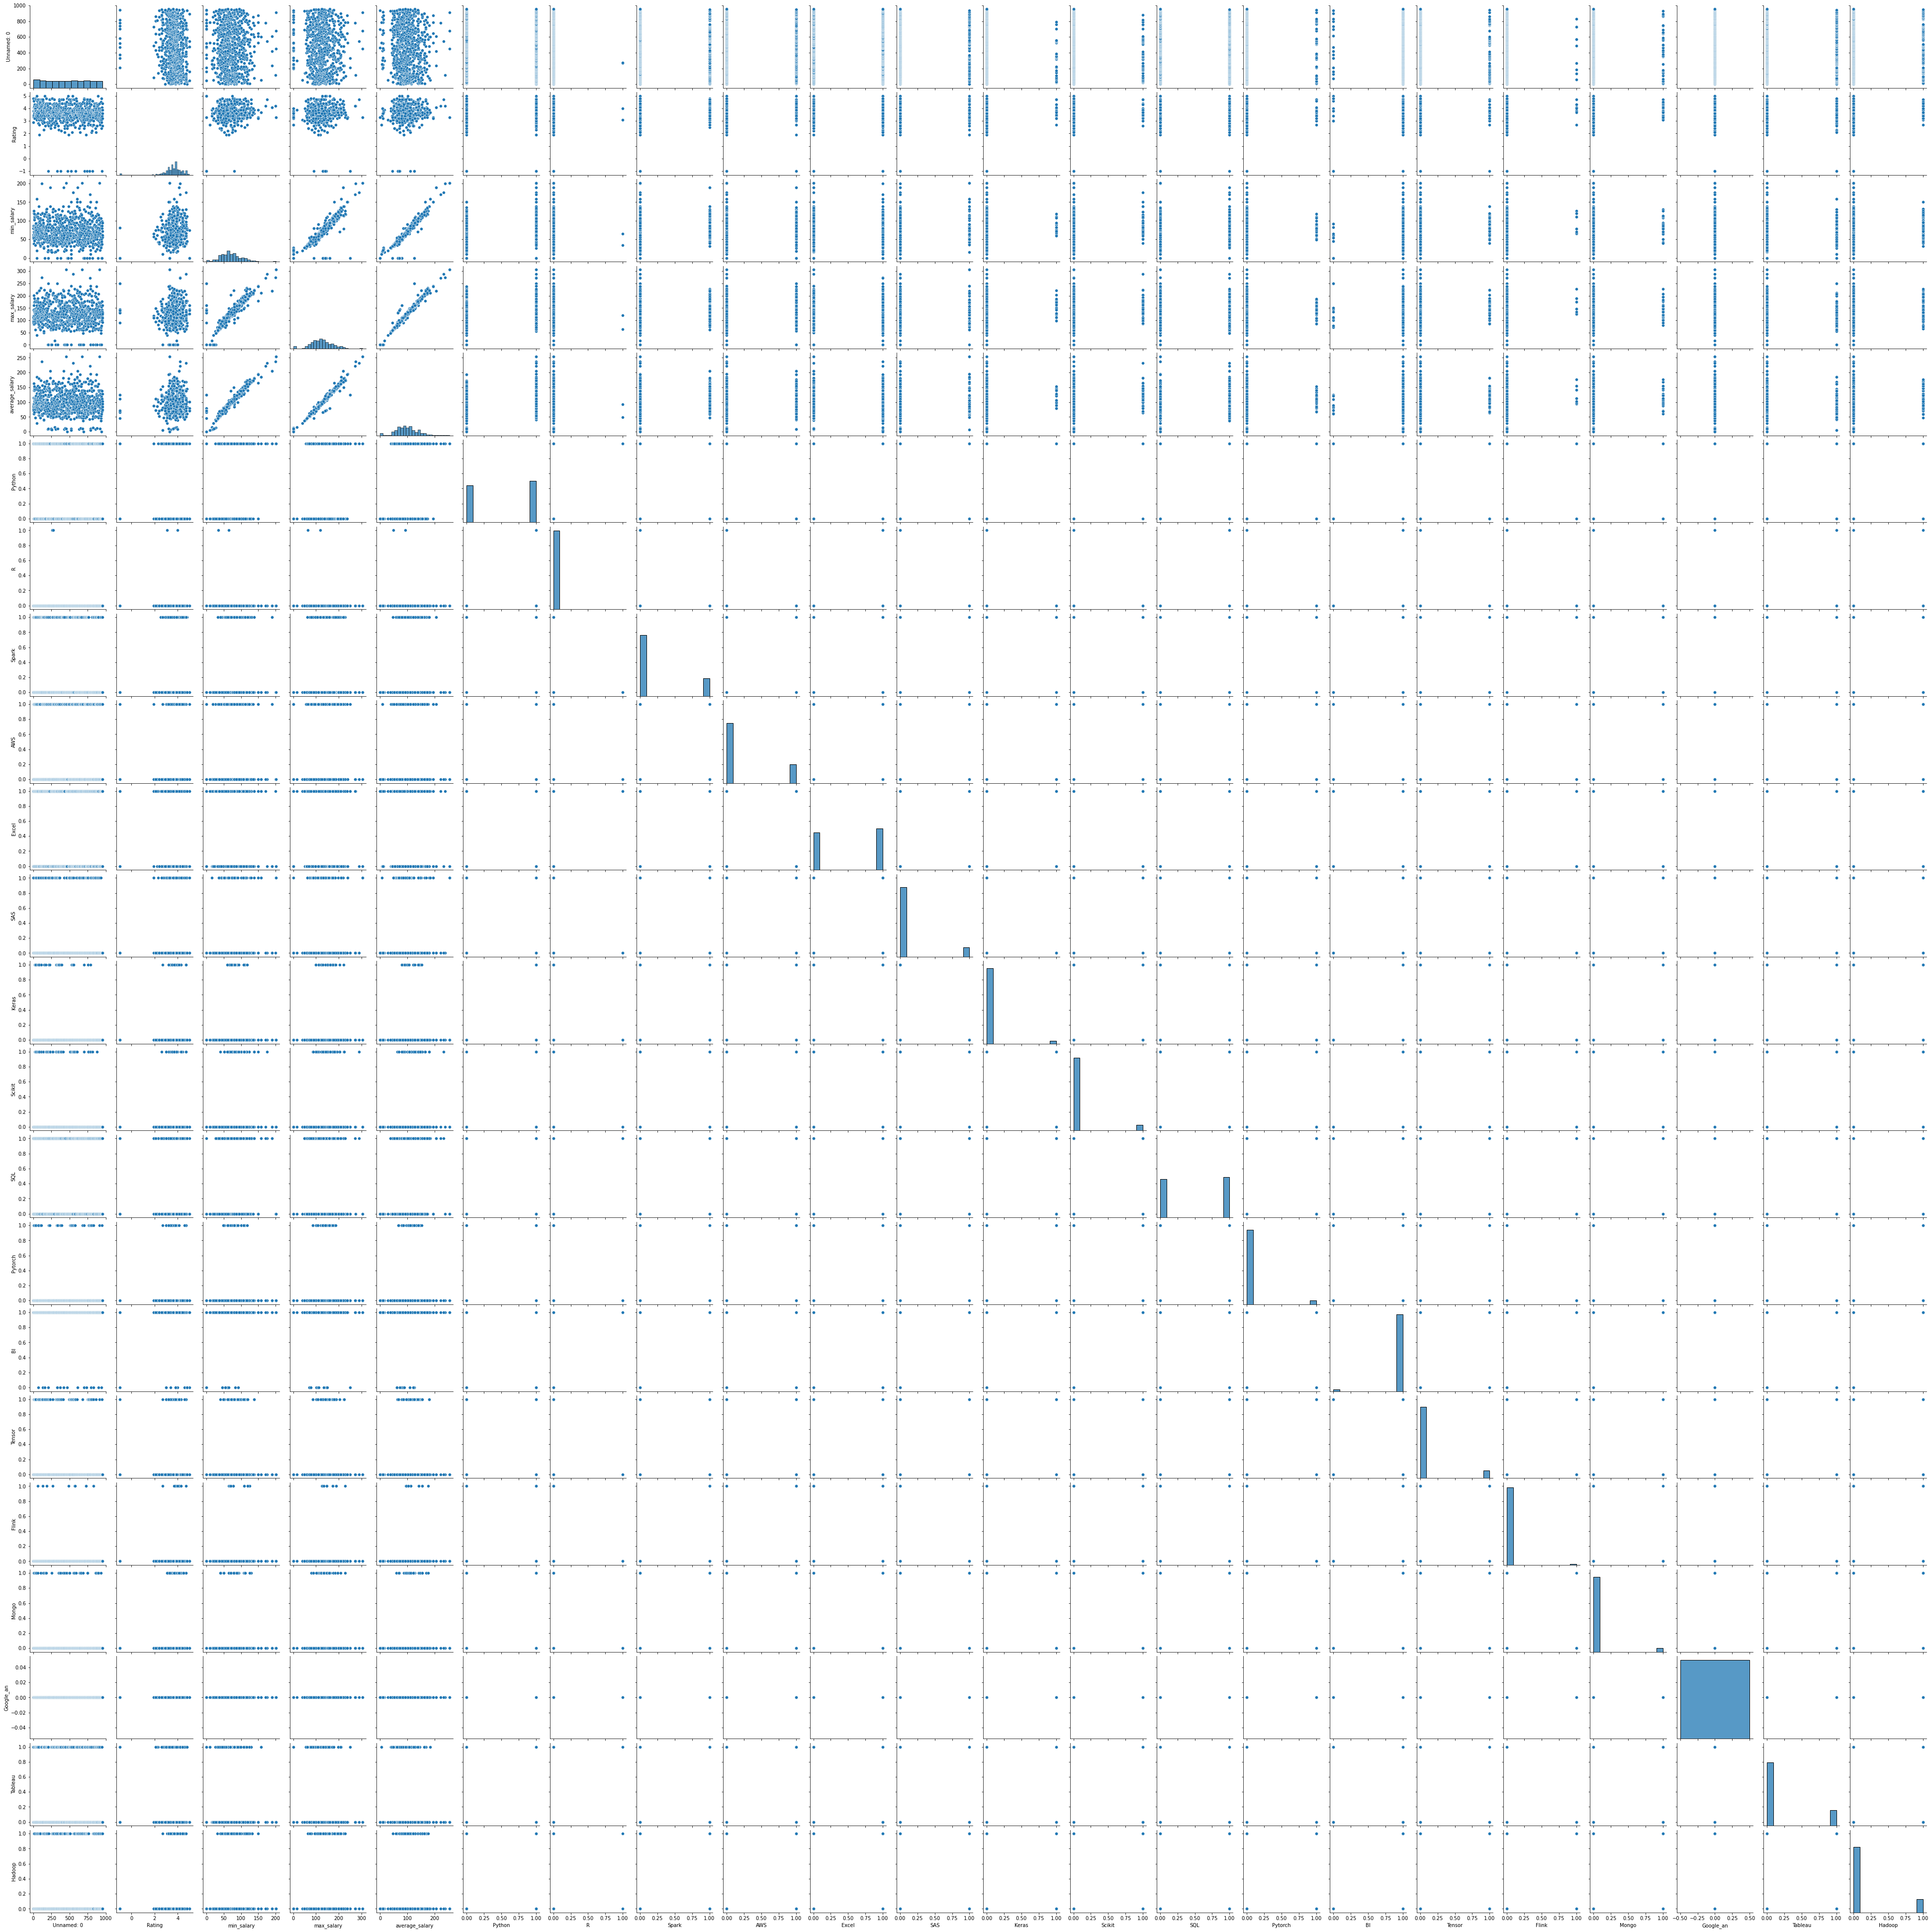

None


In [3]:
# Create heatmap for EDA
sns.heatmap(df_project.corr(), cmap="YlGnBu", annot = False)
print(plt.show())

#Create pair plot for EDA
sns.pairplot(df_project)
print(plt.show())

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [19]:
# Assign your x and y
X=df_project['Rating']
y=df_project['min_salary']

# Split the varaibles as training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
# look at the train dataset
X_train
y_train

640    79
279    72
674    72
58     54
639    32
       ..
578    92
53     86
350    74
79     86
520    69
Name: min_salary, Length: 519, dtype: int64

In [20]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regression line using "OLS"
lr=sm.OLS(y_train,X_train_sm).fit()

#Print parameters
lr.params

#Summary to list all parameters of the fitted regression
lr.summary()


C:\Users\launchcode\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             min_salary   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     34.63
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           7.18e-09
Time:                        09:25:59   Log-Likelihood:                -2519.8
No. Observations:                 519   AIC:                             5044.
Df Residuals:                     517   BIC:                             5052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9202      6.197      5.958      0.000      24.746      49.094
Rating         9.8298      1.670      5.885      0.000       6.548      13.112
==============================================================================
Omnibus:                       52.523   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.543
Skew:                           0.676   Prob(JB):                     7.22e-19
Kurtosis:                       4.426   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

Finally, plot your error terms!

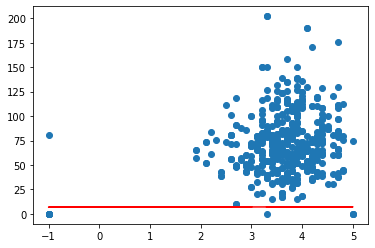

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [ ]:
## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.063 (.063)
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not at all 